**Exploratory Data Analysis (EDA)**

Check missing values

Visualize data

Understand correlations between features


In [2]:
pip install pandas

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? et


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn matplotlib ipykernel

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     -------------- ----------------------- 41.0/104.0 kB


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# import the neccesary dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
df = pd.read_csv(r"..\data\raw\heart_disease_uci.csv")

print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
# Check missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


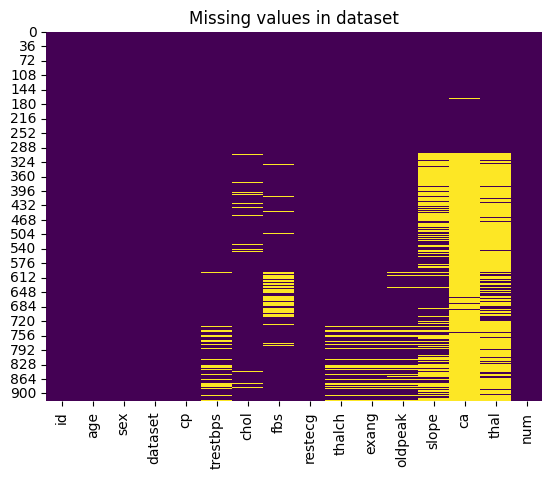

In [ ]:
# Visualize missing values
plt.Figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values in dataset")
plt.show()

In [ ]:
# Basic statistics
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000